## Regualarization Technique 

In [ ]:
### Lasso Regularization L1
### Ridge Regularization L2  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset = pd.read_csv("D:/Study/Wscube-tech/Machine-learning/Datasets/Housing.csv")
dataset.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,231300.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,510000.0


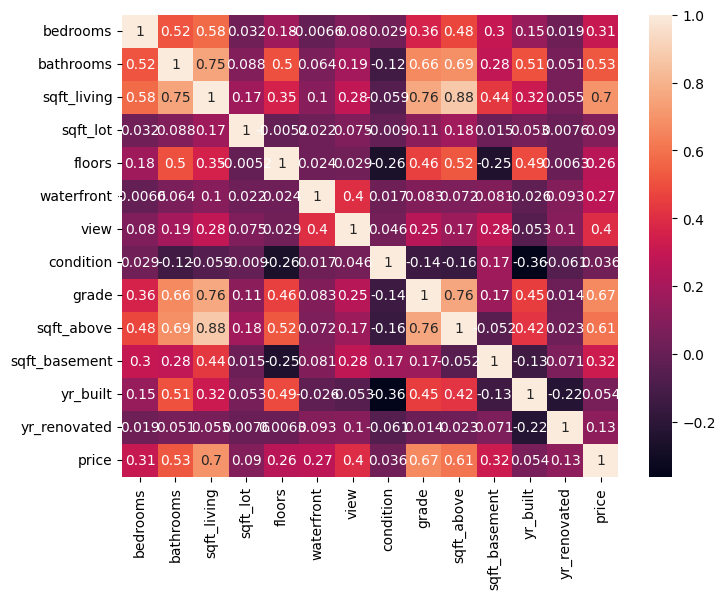

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [11]:
x = dataset.iloc[:,:-1]
y = dataset["price"]


In [15]:
## applying scaling 
sc = StandardScaler()
sc.fit(x)
x= pd.DataFrame (sc.transform(x),columns=x.columns)

from sklearn.model_selection import train_test_split

# train test splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np 

## linear regression 

In [23]:
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100


65.22190006708202

In [48]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test)))) # root mean square root 

52638289942.73241
143795.07259410326
229430.35967964746


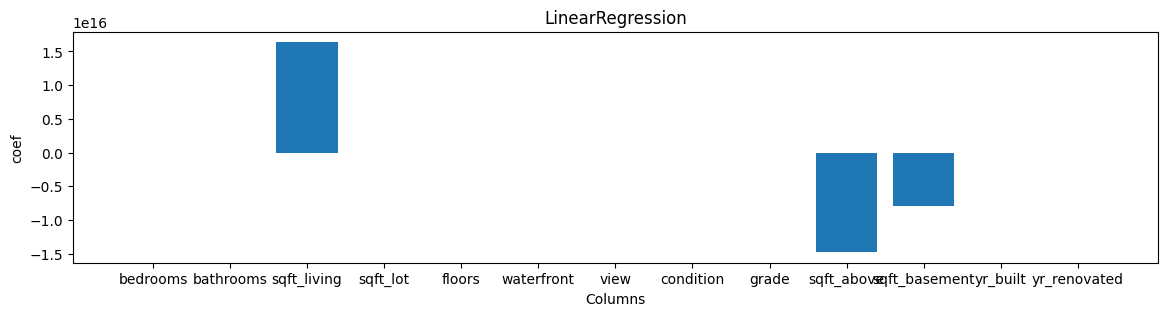

In [33]:
plt.figure(figsize=(14,3))
plt.title("LinearRegression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,lr.coef_)
plt.show()

## Lasso L1 (for feature selection )

In [37]:
la = Lasso(alpha=0.01)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

C:\Users\Salman\AppData\Local\anaconda3\envs\env_python388\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+13, tolerance: 2.262e+11
  model = cd_fast.enet_coordinate_descent(


65.2217784310269

In [49]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test)))) # root mean square root 

52638474044.62263
143793.49260366368
229430.7608944856


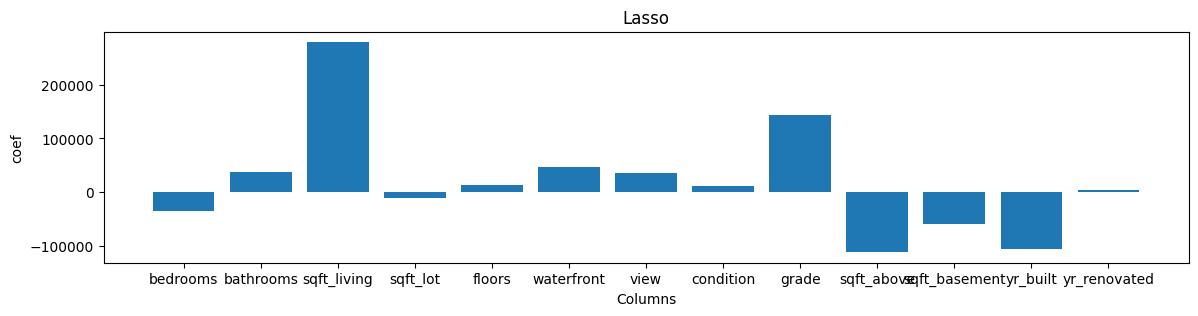

In [38]:
plt.figure(figsize=(14,3))
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,la.coef_)
plt.show()
# this graph show reducing the coefficent value 

## Ridge  (reduce overfitting )

In [40]:
ri= Ridge(alpha=10)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)*100

65.22088558059211

In [51]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test)))) # root mean square root 

# from these three model we will select ridgo bcz he will show better accuracy 

52639825415.74851
143777.74302479246
229433.70592776578


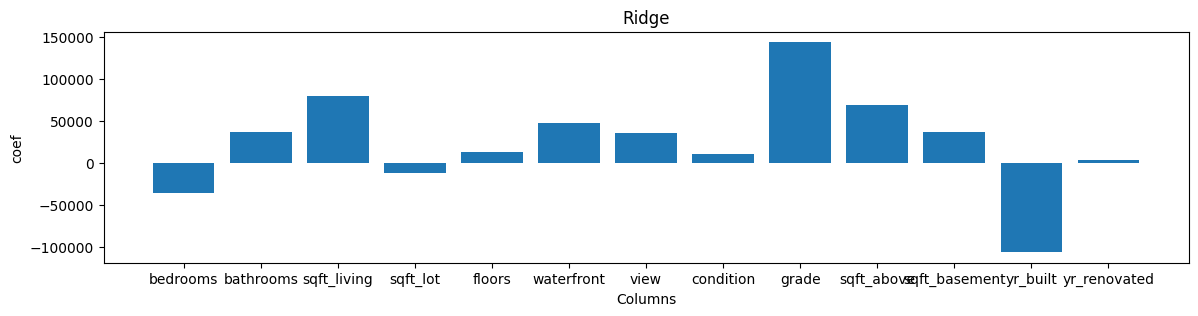

In [42]:
plt.figure(figsize=(14,3))
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.bar(x.columns,ri.coef_)
plt.show()
# this graph show reducing the coefficent value 

In [52]:
df = pd.DataFrame({"col_name": x.columns, "LinearRegression": lr.coef_, "Lasso": la.coef_, "Ridge": ri.coef_})


In [53]:
df

,col_name,LinearRegression,Lasso,Ridge
0,bedrooms,-3.567363e+04,-35667.335139,-35603.031690
1,bathrooms,3.750905e+04,37512.512734,37475.844469
2,sqft_living,1.637250e+16,279760.254425,79754.706663
3,sqft_lot,-1.153528e+04,-11535.144009,-11518.199685
4,floors,1.351102e+04,13516.388542,13515.108112
5,waterfront,4.760828e+04,47607.953647,47580.681712
6,view,3.517621e+04,35177.275117,35210.816224
7,condition,1.071460e+04,10718.548744,10740.775747
8,grade,1.441993e+05,144199.277463,144033.510918
9,sqft_above,-1.476189e+16,-111840.378810,68499.048577
